In [21]:
# import matplotlib.pyplot as plt
# import proplot as pplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os 
import geopandas as gpd


import contextily as ctx


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Update a proplot
#### !pip install --upgrade proplot --user

In [3]:
# Definir projeção
# proj = ccrs.PlateCarree(central_longitude=180)

                {'NINO1+2': {'lat': [-10, 0], 'lon': [280, 290]}, 'NINO3': {'lat': [-5, 5], 'lon': [210, 270]},

                'NINO4': {'lat': [-5, 5], 'lon': [160, 210]}, 'NINO34': {'lat': [-5, 5], 'lon': [190, 240]},
                
                'TNAI': {'lat': [5.5, 23.5], 'lon': [302.5, 345]}, 'TSAI': {'lat': [0, -20], 'lon': [-30, 10]}}


In [4]:
#  nino 3.4
lats = [-5, 5, 5, -5]
lons = [190, 190, 240, 240]

#  nino 3
lats1 = [-5, 5, 5, -5]
lons1 = [210, 210, 270, 270]

#  nino 4
lats2 = [-5, 5, 5, -5]
lons2 = [160, 160, 210, 210]

#  nino 1+2
lats3 = [-10, 0, 0, -10]
lons3 = [270, 270, 280, 280]

# Tsa
lats4 = [0, -20, -20, 0] # -5, 5, 5, -5
lons4 = [-30, -30, 10, 10] #   -57.5, -57.5, -15, -15

# Tna
lats5 = [23.5, 5.5, 5.5, 23.5] 
# Close longitude
lons5 = [302.5, 302.5, 345, 345] # 302.5, 302.5, 345, 345

# Escrever nomes das posiçoes do EL NINO
nino_1_2 = 'Niño 1+2'
nino3 = 'Niño 3'
nino4 = 'Niño 4'
nino34 = 'Niño 3.4'
tna = 'TNA'
tsa = 'TSA'

In [22]:
AMZ_shp = f'{os.path.expanduser("~")}/OneDrive/Documentos/Shapefiles/amapoly_ivb/'
AMZ_shp = gpd.read_file(AMZ_shp)

In [5]:
proj = ccrs.PlateCarree(central_longitude=-140)

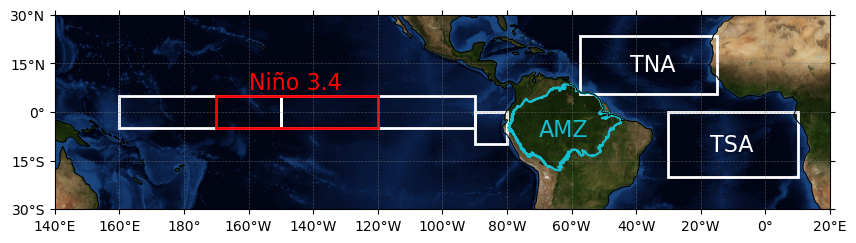

In [34]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=proj), gridspec_kw=dict(hspace=0))
# ax = ax.flatten()
# plotar o mapa
ax.set_extent([140, 380, -30, 30], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.75)

ax.text(200, 7., nino34, fontsize=16,
        color='red', transform=ccrs.PlateCarree())
# plotar as posições do NINO 3
ax.add_patch(mpatches.Polygon(np.array([lons1, lats1]).T, closed=True, transform=ccrs.PlateCarree(), facecolor='none', edgecolor='w', linewidth=2))
# plotar as posições do NINO 4
ax.add_patch(mpatches.Polygon(np.array([lons2, lats2]).T, closed=True, transform=ccrs.PlateCarree(), facecolor='none', edgecolor='w', linewidth=2))
# plotar as posições do NINO 1+2
ax.add_patch(mpatches.Polygon(np.array([lons3, lats3]).T, closed=True, transform=ccrs.PlateCarree(), facecolor='none', edgecolor='w', linewidth=2))
# plotar as posições do NINO 3.4
ax.add_patch(mpatches.Polygon(np.array([lons, lats]).T, closed=True,
                transform=ccrs.PlateCarree(), facecolor='none', edgecolor='red', linewidth=2))

# plotar as posições do TNA
ax.add_patch(mpatches.Polygon(np.array([lons5, lats5]).T, closed=True,
                transform=ccrs.PlateCarree(), facecolor='none', edgecolor='w', linewidth=2))
ax.text(-42, 12.5, tna, fontsize=16, color='w',
        transform=ccrs.PlateCarree())
# plotar as posições do TSA
ax.add_patch(mpatches.Polygon(np.array([lons4, lats4]).T, closed=True,
                transform=ccrs.PlateCarree(), facecolor='none', edgecolor='w', linewidth=2))
ax.text(-17, -12, tsa, fontsize=16, color='w',
        transform=ccrs.PlateCarree())



# # Ticks X
ax.set_xticks(
     np.arange(140, 380 + 20, 20), crs=ccrs.PlateCarree())
ax.set_xticklabels(['140°E', '160°E', '180°', '160°W', '140°W', '120°W', '100°W', '80°W', '60°W', '40°W', '20°W', '0°', '20°E'])

# # Ticks Y
ax.set_yticks(np.arange(-30, 40, 15), crs=ccrs.PlateCarree())
ax.set_yticklabels([
        '30°S', '15°S', '0°', '15°N', '30°N'
])


# features cartopy
# ax.add_feature(cfeature.LAND.with_scale('110m'), facecolor='k')
# ax.add_feature(cfeature.OCEAN.with_scale('110m'), facecolor='none')

# tick params
ax.tick_params(axis='both', which='major', top=True, right=True)

# grid
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
#                    linewidth=0.5, color='gray', alpha=0.5, linestyle='--')      
ax.grid(linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# # Add contextily basemap
# ctx.add_basemap(ax, crs=proj, source=ctx.providers.OpenStreetMap.Mapnik, attribution=False) # CartoDB.Positron
# Add basemap nasa
# ctx.add_basemap(ax, crs=proj, source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012, attribution=False)
# Background
ax.background_img(name='BM', resolution='high')

# Add shapefile
AMZ_shp.plot(ax=ax, color='none', edgecolor='tab:cyan', linewidth=1.5, transform=ccrs.PlateCarree())
# Add text AMZ
ax.text(-70, -7.5, 'AMZ', fontsize=16, color='tab:cyan',
        transform=ccrs.PlateCarree())


# Save figure
fig.savefig('NINO+DIPOLO_AMZ.png', dpi=600, bbox_inches='tight', facecolor='w')